In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# read csv file
df_fc = pd.read_csv(r'C:\Users\Administrator\Documents\Machine Learning\Files_CSV\FuelConsumption.csv')
df_fc.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Selecting columns
cdf = df_fc[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# take a look at the dataset
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


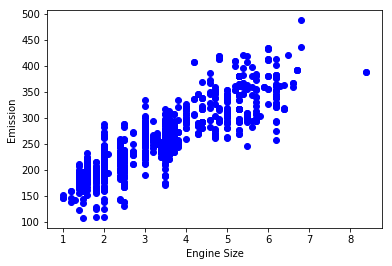

In [4]:
#  plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [6]:
# Creating train and test dataset
msk = np.random.rand(len(df_fc)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [7]:
#selecting the degree of the polynomial to be 2 which will generate 3 features, degree=0, degree=1 and degree=2:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [8]:
# treating polynomial regression as linear regression
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# the coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         51.3393972  -1.66644853]]
Intercept:  [106.29892394]


Text(0, 0.5, 'Emission')

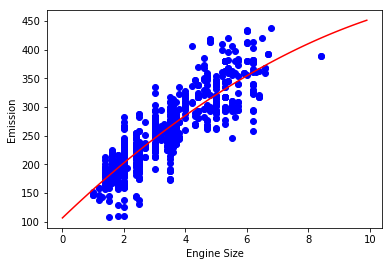

In [9]:
# ploting polynomial
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]* XX +clf.coef_[0][2]* np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [10]:
from sklearn.metrics import r2_score

# model evalutation
test_x_poly = poly.fit_transform(test_x)
test_y_  = clf.predict(test_x_poly)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Resudual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y)** 2))
print('R2-score: %.2f' % r2_score(test_y_, test_y))

Mean absolute error: 22.53
Resudual sum of squares (MSE): 890.43
R2-score: 0.69


In [24]:
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly




array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [25]:
# treating polynomial regression as linear regression
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# the coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         27.43817401  4.87093924 -0.53838375]]
Intercept:  [131.8263436]


Text(0, 0.5, 'Emission')

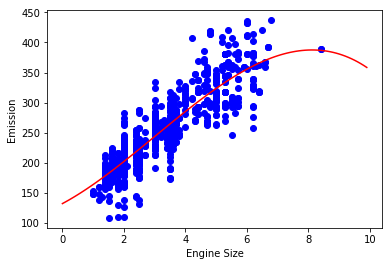

In [26]:
# ploting polynomial
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]* XX +clf.coef_[0][2]* np.power(XX, 2) +clf.coef_[0][3]* np.power(XX, 3)
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [28]:
from sklearn.metrics import r2_score

# model evalutation
test_x_poly = poly.fit_transform(test_x)
test_y_  = clf.predict(test_x_poly)

print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Resudual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y)** 2))
print('R2-score: %.2f' % r2_score(test_y_, test_y))

Mean absolute error: 22.48
Resudual sum of squares (MSE): 892.42
R2-score: 0.69


The results between polynomial 2nd  and 3rd degree are the same 